In [20]:
# importing data manipulation as well as plotting packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# importing statistical packages
import statsmodels.api as sm
import scipy
import re

%matplotlib inline

In [21]:
# importing the environment canada data set with the date as the index column
gwv_data = pd.read_csv('../data/c46131.csv', sep=',', index_col='DATE')

# Deleting empty columns
del gwv_data['WSS$']
del gwv_data['WSS$.1']



In [22]:
# Chagning the data index (time) into pandas datetime format
gwv_data.index = pd.to_datetime(gwv_data.index, unit='m')

# Collapsing the data so that all data are averaged over a 1 month perdiod
gwv_monthly = gwv_data.resample('M', how=('mean'))

# Subsetting the data for the last 11 years (this is the time period for which the plankton data have been collected)
gwv_modern = gwv_monthly['2005-01-01':'2015-10-31']

# dropping the rows where naN's are present in anticipation of calculating the linear model
gwv_modern = gwv_modern.dropna()
gwv_modern.head()

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,
2005-01-31,1.409459,49.91,124.99,14,0.368446,3.703676,0.367973,0.697027,3.603378,206.602703,5.264324,6.656216,204.608108,5.347297,6.777162,1015.986486,1015.981081,4.918108,7.245676
2005-02-28,1.873874,49.91,124.99,14,0.226757,3.811862,0.221171,0.565465,3.505856,230.183183,3.895495,4.872072,226.009009,3.941291,4.956156,1019.557357,1019.563363,5.710661,7.261562
2005-03-31,1.432099,49.91,124.99,14,0.379520,3.638724,0.378738,1.016049,3.503155,194.122085,5.304664,6.520439,192.533608,5.334294,6.586145,1014.696845,1014.736351,8.226337,8.755144
2005-04-30,1.531161,49.91,124.99,14,0.480354,3.858300,0.476912,1.323938,3.758782,194.838527,5.837960,7.234136,190.950425,5.794051,7.208074,1014.522663,1014.573088,10.098725,10.296459
2005-05-31,1.518268,49.91,124.99,14,0.302179,3.242327,0.298647,1.072666,3.144114,209.167794,4.934777,5.959811,204.784844,4.875643,5.938836,1013.208931,1013.316103,13.606901,13.626116


In [24]:
# calculating the linear model for significant wave height and sea surface temperature
lm = sm.formula.ols(formula='sig_wave_height ~ sea_surface_temperature', data = gwv_modern).fit()

# Creating a new data frame with the range of x values that we will pass the linear model
range_data_x = pd.DataFrame({'sea_surface_temperature': range(6, 19)})

# Calculating the linear model predictions from the x values in our range data set
y_preds = lm.predict(range_data_x)
y_preds[1:10]

array([ 0.45946216,  0.43503807,  0.41061399,  0.3861899 ,  0.36176581,
        0.33734172,  0.31291763,  0.28849354,  0.26406946])

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


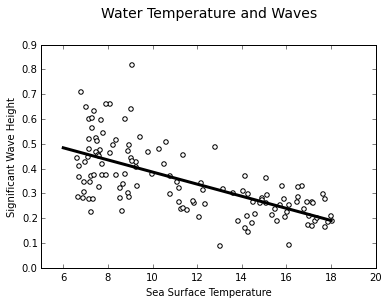

In [25]:
# Plotting sea surface temperature and significant wave height again... But this time with the linear model included
gwv_modern.plot(kind='scatter', x= 'sea_surface_temperature', y='sig_wave_height', color='w')

plt.xlabel('Sea Surface Temperature')
plt.ylabel('Significant Wave Height')
plt.title('Water Temperature and Waves', y=1.1, fontsize=14)

plt.xlim(5, 20)
plt.ylim(0,0.9)

plt.plot(range_data_x, y_preds, color='k', linewidth=3)

In [26]:
# Obtaining the intercept and slope of the linear model
print(lm.params)

# Obtaining the linear regression statistical summary
print(lm.summary())

Intercept                  0.630431
sea_surface_temperature   -0.024424
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        sig_wave_height   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     97.20
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           2.25e-17
Time:                        09:54:49   Log-Likelihood:                 108.09
No. Observations:                 129   AIC:                            -212.2
Df Residuals:                     127   BIC:                            -206.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------

In [27]:
# Chagning the data index (time) into pandas datetime format
gwv_data.index = pd.to_datetime(gwv_data.index, unit='m')

# Collapsing the data so that all data are averaged over an annual perdiod
gwv_yearly = gwv_data.resample('A', how=('mean'))

# Subsetting the data for the last 11 years (this is the time period for which the plankton data have been collected)
gwv_modern_yearly = gwv_yearly['2005-01-01':'2015-10-31']

# dropping the rows where naN's are present in anticipation of calculating the linear model
gwv_modern_yearly = gwv_modern_yearly.dropna()
gwv_modern_yearly.head()

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,
2005-12-31,1.508283,49.91,124.99,14,0.320708,3.493091,0.318776,0.877520,3.382248,214.772895,4.810999,5.944259,211.598711,4.771641,5.937276,1015.720824,1015.648792,10.829337,11.617879
2006-12-31,1.490228,49.91,124.99,14,0.366603,3.455356,0.376901,0.922519,3.334107,220.891691,5.321851,6.530097,217.234018,5.292548,6.545417,1015.253688,1015.099483,10.344244,11.031976
2007-12-31,1.871421,49.91,124.99,14,0.366006,3.909711,0.426558,1.042308,3.388279,197.652021,5.132313,6.364935,199.296322,5.428285,6.794989,1016.627892,1016.626418,10.107510,11.041044
2008-12-31,1.364909,49.91,124.99,14,0.388762,3.325326,0.387898,1.023543,3.277791,206.560972,4.955423,6.131484,207.888757,5.240547,6.542872,1017.232712,1017.252794,9.275505,10.336478
2009-12-31,1.496609,49.91,124.99,14,0.371986,3.342011,0.369375,1.043388,3.263429,220.487406,4.940191,6.103693,215.063696,5.268830,6.557920,1016.842298,1016.888896,9.741838,10.863127


In [28]:
#calculating the linear model for significant wave height and sea surface temperature
lm = sm.formula.ols(formula='sig_wave_height ~ sea_surface_temperature', data = gwv_modern_yearly).fit()

# Creating a new data frame with the range of x values that we will pass the linear model
range_data_x = pd.DataFrame({'sea_surface_temperature': range(6, 19)})

# Calculating the linear model predictions from the x values in our range data set
y_preds = lm.predict(range_data_x)
y_preds[1:10]

array([ 0.50262015,  0.46849507,  0.43436998,  0.4002449 ,  0.36611982,
        0.33199473,  0.29786965,  0.26374457,  0.22961948])

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


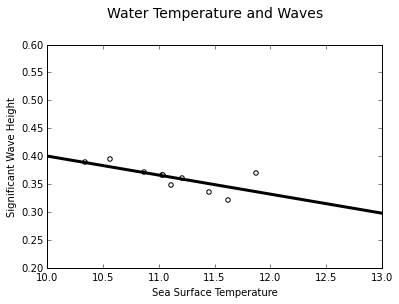

In [29]:
# Plotting sea surface temperature and signficant wave height with the linear model included
gwv_modern_yearly.plot(kind='scatter', x= 'sea_surface_temperature', y='sig_wave_height', color='w')

plt.xlabel('Sea Surface Temperature')
plt.ylabel('Significant Wave Height')
plt.title('Water Temperature and Waves', y=1.1, fontsize=14)

plt.xlim(10, 13)
plt.ylim(0.2,0.6)

plt.plot(range_data_x, y_preds, color='k', linewidth=3)

In [30]:
# Obtaining the intercept and slope of the linear model
print(lm.params)

# Obtaining the linear regression statistical summary
print(lm.summary())


Intercept                  0.741496
sea_surface_temperature   -0.034125
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        sig_wave_height   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     7.622
Date:                Wed, 11 Nov 2015   Prob (F-statistic):             0.0246
Time:                        09:54:58   Log-Likelihood:                 27.551
No. Observations:                  10   AIC:                            -51.10
Df Residuals:                       8   BIC:                            -50.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------

//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  int(n))


In [89]:
# Chagning the data index (time) into pandas datetime format
gwv_data.index = pd.to_datetime(gwv_data.index, unit='m')

# Collapsing the data so that all data are averaged over an annual perdiod
gwv_daily = gwv_data.resample('d', how=('mean'))

# Subsetting the data for 4 years between 2009 and 2012 (this is the time period for which the plankton data have been collected)
gwv_modern_daily = gwv_daily['2009-02-20':'2009-06-28'] 

# dropping the rows where naN's are present in anticipation of calculating the linear model
gwv_modern_daily = gwv_modern_daily.dropna()
gwv_modern_daily.head()

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,
2009-02-20,2.434783,49.91,124.99,14,0.060435,2.730870,0.052174,0.191304,2.517391,218.608696,2.108696,2.626087,234.130435,2.452174,3.034783,1025.208696,1025.252174,5.491304,6.734783
2009-02-21,3.500000,49.91,124.99,14,0.042500,3.413333,0.016667,0.116667,3.237500,288.958333,1.745833,2.312500,271.875000,2.120833,2.700000,1021.358333,1021.420833,4.950000,6.679167
2009-02-22,2.625000,49.91,124.99,14,0.057917,2.862917,0.045833,0.150000,2.891667,207.833333,1.620833,2.308333,212.041667,2.041667,2.808333,1011.775000,1011.816667,5.950000,6.612500
2009-02-23,2.375000,49.91,124.99,14,0.066667,3.050417,0.054167,0.137500,2.895833,261.958333,2.429167,2.925000,262.083333,2.733333,3.279167,1011.204167,1011.262500,6.104167,6.695833
2009-02-24,3.000000,49.91,124.99,14,0.105417,3.132083,0.083333,0.262500,2.900000,180.625000,2.695833,3.304167,180.166667,3.070833,3.745833,1004.829167,1004.875000,6.629167,6.762500


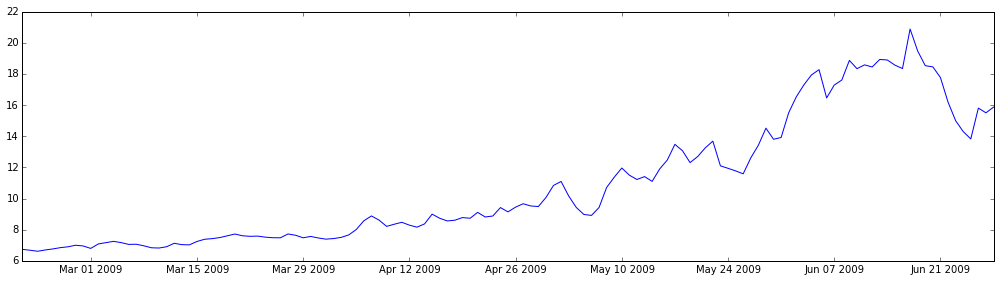

In [90]:
plt.figure(figsize=(14,4))
plt.plot(gwv_modern_daily.index, gwv_modern_daily.sea_surface_temperature)

# give plots some breathing room
plt.tight_layout()

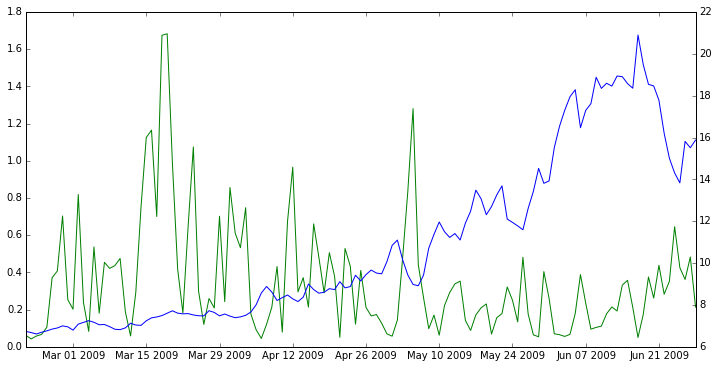

In [91]:
fig = plt.figure(figsize=(14,4))
#sst_swh = plt.plot(gwv_modern_daily.index, gwv_modern_daily.sig_wave_height, gwv_modern_daily.index, gwv_modern_daily.sea_surface_temperature)

# give plots some breathing room
#plt.tight_layout()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(gwv_modern_daily.index, gwv_modern_daily.sig_wave_height, 'g-')
ax2.plot(gwv_modern_daily.index, gwv_modern_daily.sea_surface_temperature, 'b-')

fig.set_size_inches(12, 6)


plt.show()

In [34]:
zoo= pd.read_csv('../data/Zooplankton_2009-2012.csv', sep=',', index_col='Date')
zoo.index = pd.to_datetime(zoo.index, unit='d')

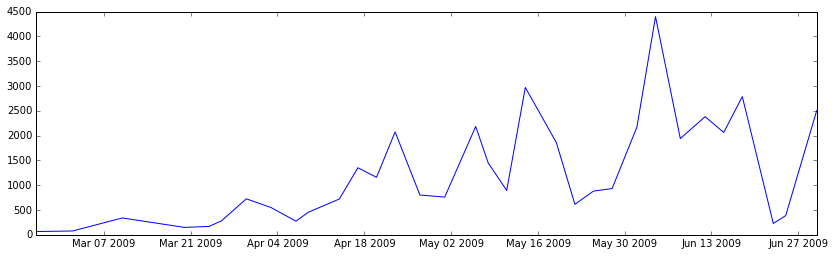

In [35]:
zoo_2009 = zoo['2009']
plt.figure(figsize=(14,4))
plt.plot(zoo_2009.index, zoo_2009.Total)

Now that I have my zooplankton data for the Northern Strait of Georgia area, I want to create a timeseries plot comparing the zooplankton abundance for a certain year to the significant wave height and the sea surface temperature. This plot will allow me to visually observe the trends of these three varaibles over the course of the spring bloom season. 

The largest problem with producing a timeseries plot for these datasets is the mismatch in their observation frequencies. In other words, the zooplnakton data was recorded once a week for some months, but roughly twice a week for others, whereas the environment Canada dataset was recorded once every hour. However, these observation frequencies will need to be unified in order to produce a graph. To overcome this problem, I averaged the zooplankton abundance data over a week long period, so that no matter how many times in a week the plankton were sampled, only 1 data point would exist for that week. Similarly I averaged all of the environment Canada data out over a week long period. I just had to make sure that the date timeline of the environment Canada data was approximately as long as date timeline of the zooplnakton data to ensure that I got the same number of weeks for both data sets. 

In [192]:
# Resampling the gwv_data (environment Canada data) into weekly averages for the spring of 2009 
# Chagning the data index (time) into pandas datetime format
gwv_data.index = pd.to_datetime(gwv_data.index, unit='m')

# Collapsing the data so that all data are averaged over a weekly perdiod
gwv_weekly = gwv_data.resample('W', how=('mean'))

# Subsetting the data for the spring plankton bloom in the 2009 
gwv_sp2009_weekly = gwv_weekly['2009-02-24':'2009-07-05'] 

# dropping the rows where naN's are present in anticipation of calculating the linear model (just in case)
gwv_sp2009_weekly = gwv_sp2009_weekly.dropna()
gwv_sp2009_weekly.head(n=2)
    

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,
2009-03-01,1.821429,49.91,124.99,14,0.301429,3.386369,0.295238,0.684524,3.273214,208.934524,4.554167,5.676786,209.232143,4.901786,6.13631,1013.880357,1013.929167,4.255952,6.850595
2009-03-08,1.107784,49.91,124.99,14,0.389880,3.078623,0.390419,0.922156,3.087425,244.922156,5.694611,7.136527,234.323353,6.044311,7.62515,1011.767066,1011.811377,5.823952,7.107784


In [197]:
# Now resampling the plankton data into weekly averages of abundance to match the environment Canada data
zoo_2009_weekly = zoo_2009.resample('W', how=('mean'))
zoo_2009_weekly.head(n=2)

,copepods,Cirripedia,euph. larvae,euphausid,Ostracods,Oiklioplera,Bryozoan Larvae(m3),Decapod,Cnidarians,Annelids,Malacostra,Cladocera,Chaetognath,mollusc/gastropod,Other larvae,Total
Date,,,,,,,,,,,,,,,,
2009-03-01,56.36,0.13,0,0.51,1.65,1.40,0.13,0.76,2.42,0,0.25,0,0.51,0,0.89,65.01
2009-03-08,1.15,70.23,0,0.25,1.27,0.25,0.38,1.02,1.27,0,0.89,0,0.51,0,0.00,77.35


In [198]:
#Ensuring that the zooplankton data and the environment Canada data have the same number of rows/weeks
print(zoo_2009_weekly.shape)
print(gwv_sp2009_weekly.shape)

(19, 16)
(19, 19)


Now that the environment Canada data and the zooplankton data have been averaged weekly over the same spring duration, I can now add my three varaibles of interest (zooplankton abundance, sea surface temperature, and significant into one dataframe. I believe this will make plotting and statistical analysis easier in the future.

In [195]:
# Creating a Dataframe that combines the zooplankton data as well as the sea surface temperature and significant wave height
combination_data_2009 = pd.DataFrame({'zoo_abundance': zoo_2009_weekly.Total, 'sea_surface_temperature': gwv_sp2009_weekly.sea_surface_temperature, 'significant_wave_height': gwv_sp2009_weekly.sig_wave_height })
combination_data_2009

,sea_surface_temperature,significant_wave_height,zoo_abundance
DATE,,,
2009-03-01,6.850595,0.301429,65.010
2009-03-08,7.107784,0.389880,77.350
2009-03-15,6.998802,0.476826,339.820
2009-03-22,7.544311,0.977545,149.490
2009-03-29,7.559880,0.475150,225.255
2009-04-05,7.575595,0.465536,637.085
2009-04-12,8.485629,0.363114,364.630
2009-04-19,8.602381,0.402381,1036.385
2009-04-26,9.079762,0.305060,1616.540


Now that I have a dateframe containing my three varaibles of interest (zooplaknton abundance, sea surface temperature and significant wave height), I can plot all of these on a timeseries plot to compare their trends.

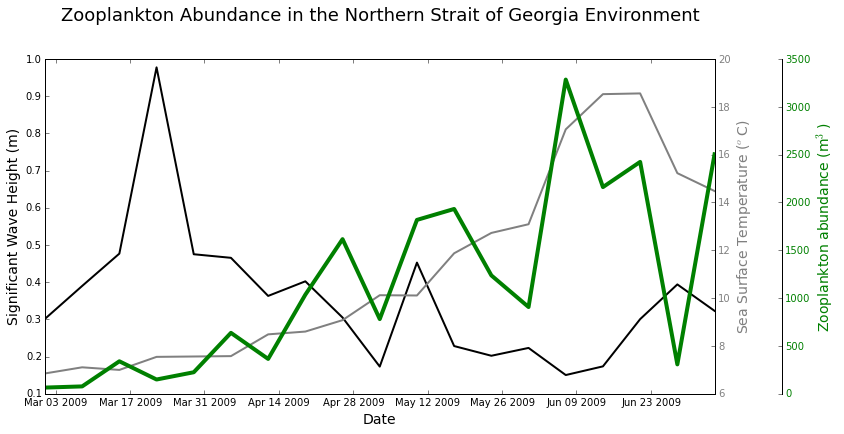

In [189]:
# Creating a timeseries plot of average zooplankton abundance, sea surface temperature and significant wave height per week for the spring of 2009
# This plot requires 3 y-axes, thus I need to first make a subplot called ax1 (subplot required for later spine adding step)
fig, ax1 = plt.subplots()

# adds the spines (or axes) for the second (ax2) and third (ax3) plot on top of the first plot
# layering the plots on top of one another
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outline above
# Setting the color and width of lines on the graph
ax1.plot(combination_data_2009.index, combination_data_2009.significant_wave_height, 'k-', linewidth =2)
ax2.plot(combination_data_2009.index, combination_data_2009.sea_surface_temperature, 'grey', linewidth=2)
ax3.plot(combination_data_2009.index, combination_data_2009.zoo_abundance, 'g-', linewidth=4)

# Adjusting the figure size
fig.set_size_inches(12, 6)

# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
zoo_spine = ax3.spines['right']
zoo_spine.set_position(('axes', 1.1))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')

# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel('Date', fontsize=14, y=0)
ax1.set_ylabel('Significant Wave Height (m)', fontsize = 14, color ='k')
ax2.set_ylabel('Sea Surface Temperature ($^o$C)', fontsize = 14, color='grey')
ax3.set_ylabel('Zooplankton abundance (m$^3$)', fontsize = 14, color='g')

# Creating an axes title
plt.title('Zooplankton Abundance in the Northern Strait of Georgia Environment', fontsize=18, y=1.1)

# Showing the plot
plt.show()